# Student Performance Indicator 

Life Cycle of Machine Learning project 
1. Understanding the problem statement 
2. Data COllection
3. Data checks to perform 
4. EDA
5. Data Pre-processing 
6. Model Training
7. Choose best model 

## Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
## Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977\n",
- The data consists of 8 column and 1000 rows.

### Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# Import csv file as a dataframe

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information
- gender : sex of students  -> (Male/female),
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## Data Checks to perform 
1. Check missing values 
2. Check duplicates 
3. Check data type 
4. Check the number of unique values of each column 
5. Check statistics of each dataset
6. Check various categories present in different categorical column

## Check missing values

In [6]:
df.isnull().sum()

# No missing values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## Check duplicates

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Check the number of unique values of each column 

In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## Check statistics of dataset

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights 
1. From above description of numerical data , all means are very close to each other- between 66 and 68 
2. All standard deviations are close between 14-16 
3. While there is minimum score=0 for math, for writing minimum is much higher=10 and for reading minimum is the highest=17 

## Explore data 


In [15]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [24]:
print("Categories in gender variable", end=  " ")
print(df['gender'].unique())

print("Categories in race_ethinicity variable", end= " ")
print(df['race_ethnicity'].unique())

print("Categories in parental_level_of_education variable ", end= " ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch variable", end = " ")
print(df['lunch'].unique())

print("Categories in test_preparation_course", end=" ")
print(df['test_preparation_course'].unique())


Categories in gender variable ['female' 'male']
Categories in race_ethinicity variable ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable ['standard' 'free/reduced']
Categories in test_preparation_course ['none' 'completed']


### Numerical and categorical columns 

In [26]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print("We have {} numeric features : {}".format(len(numeric_features),numeric_features))
print("We have {} categorical_features: {}".format(len(categorical_features),categorical_features))

We have 3 numeric features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical_features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## TOTal score and average

In [27]:
df['Total_Score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average']=df['Total_Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [31]:
reading_full_marks=df[df['reading_score']==100]['Average'].count()
maths_full_marks=df[df['math_score']==100]['Average'].count()
writing_full_marks=df[df['writing_score']==100]['Average'].count()

print(f"Number of students with full marks in reading: {reading_full_marks}")
print(f"Number of students with full marks in maths: {maths_full_marks}")
print(f"Number of students with full marks in writing: {writing_full_marks} ")

Number of students with full marks in reading: 17
Number of students with full marks in maths: 7
Number of students with full marks in writing: 14 


In [37]:
reading_less_20=df[df['reading_score']<=20]['Average'].count() 
writing_less_20=df[df['writing_score']<=20]['Average'].count()
math_less_20=df[df['math_score']<=20]['Average'].count()

print(f"Number of students who got less than 20 in reading: {reading_less_20}")
print(f"Number of students who scored less than 20 in writing: {writing_less_20}")
print(f"Number of students who got less than 20 in maths : {math_less_20}")

Number of students who got less than 20 in reading: 1
Number of students who scored less than 20 in writing: 3
Number of students who got less than 20 in maths : 4


## Insights 
1. Students performed the worst in maths 
2. Best performance in reading 

## Data Visualization

Visualize the average score distribution to make some conclusion
1. Histogram
2. Kernel Density Estimator 

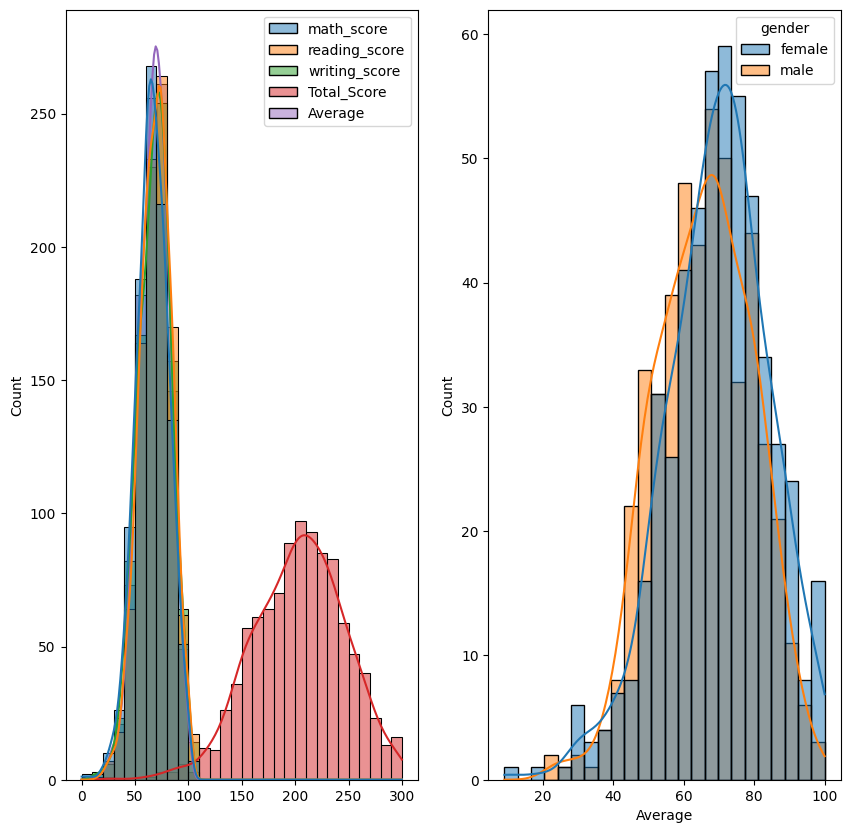

In [43]:
fig,axs=plt.subplots(1,2,figsize=(10,10))
plt.subplot(121)
sns.histplot(data=df,bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()


In [44]:
df.head(0)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average


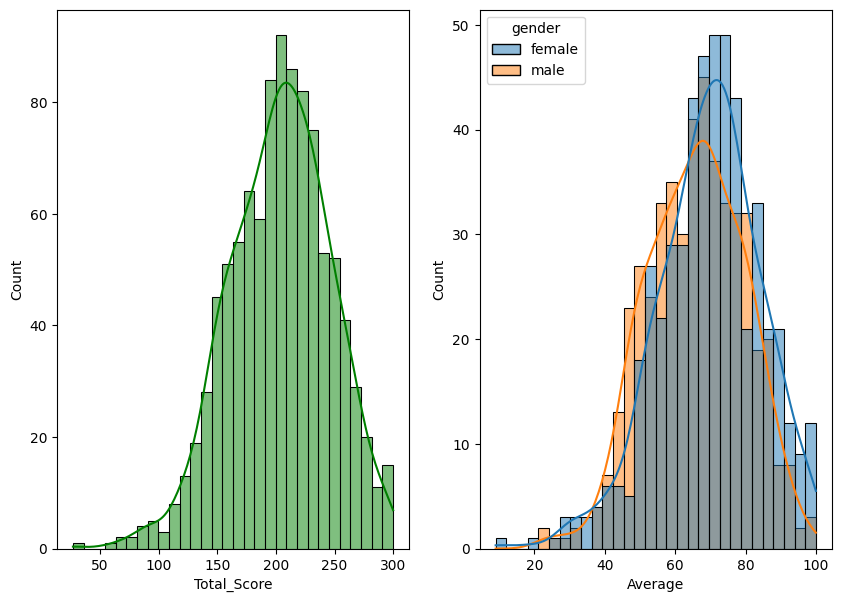

In [52]:
fig,axs=plt.subplots(1,2,figsize=(10,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,kde=True,x="Average",bins=30,hue='gender')
plt.show()

## Insights 
Female students perform better than males

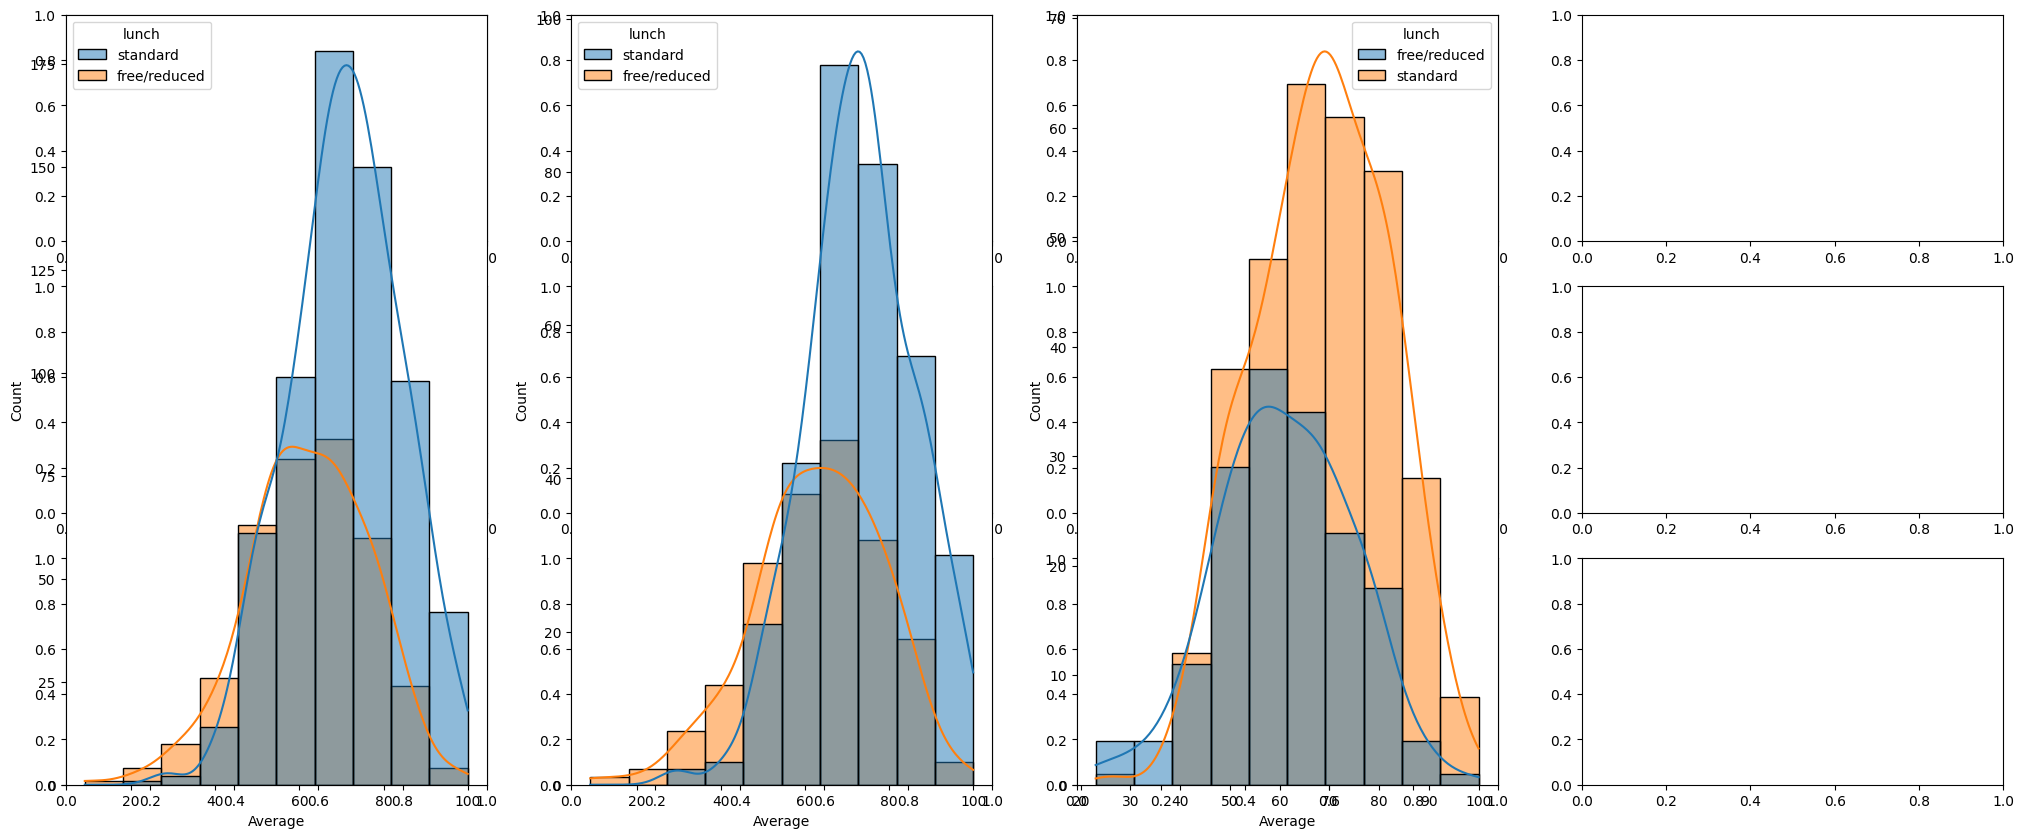

In [59]:
plt.subplots(3,4,figsize=(25,10))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,bins=10,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',bins=10,kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',bins=10,kde=True,hue='lunch')
plt.show()

## Insights 
1. Standard lunch helps in performing well in exams be it a male or female

In [60]:
df.head(0)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average


<Axes: xlabel='Average', ylabel='Count'>

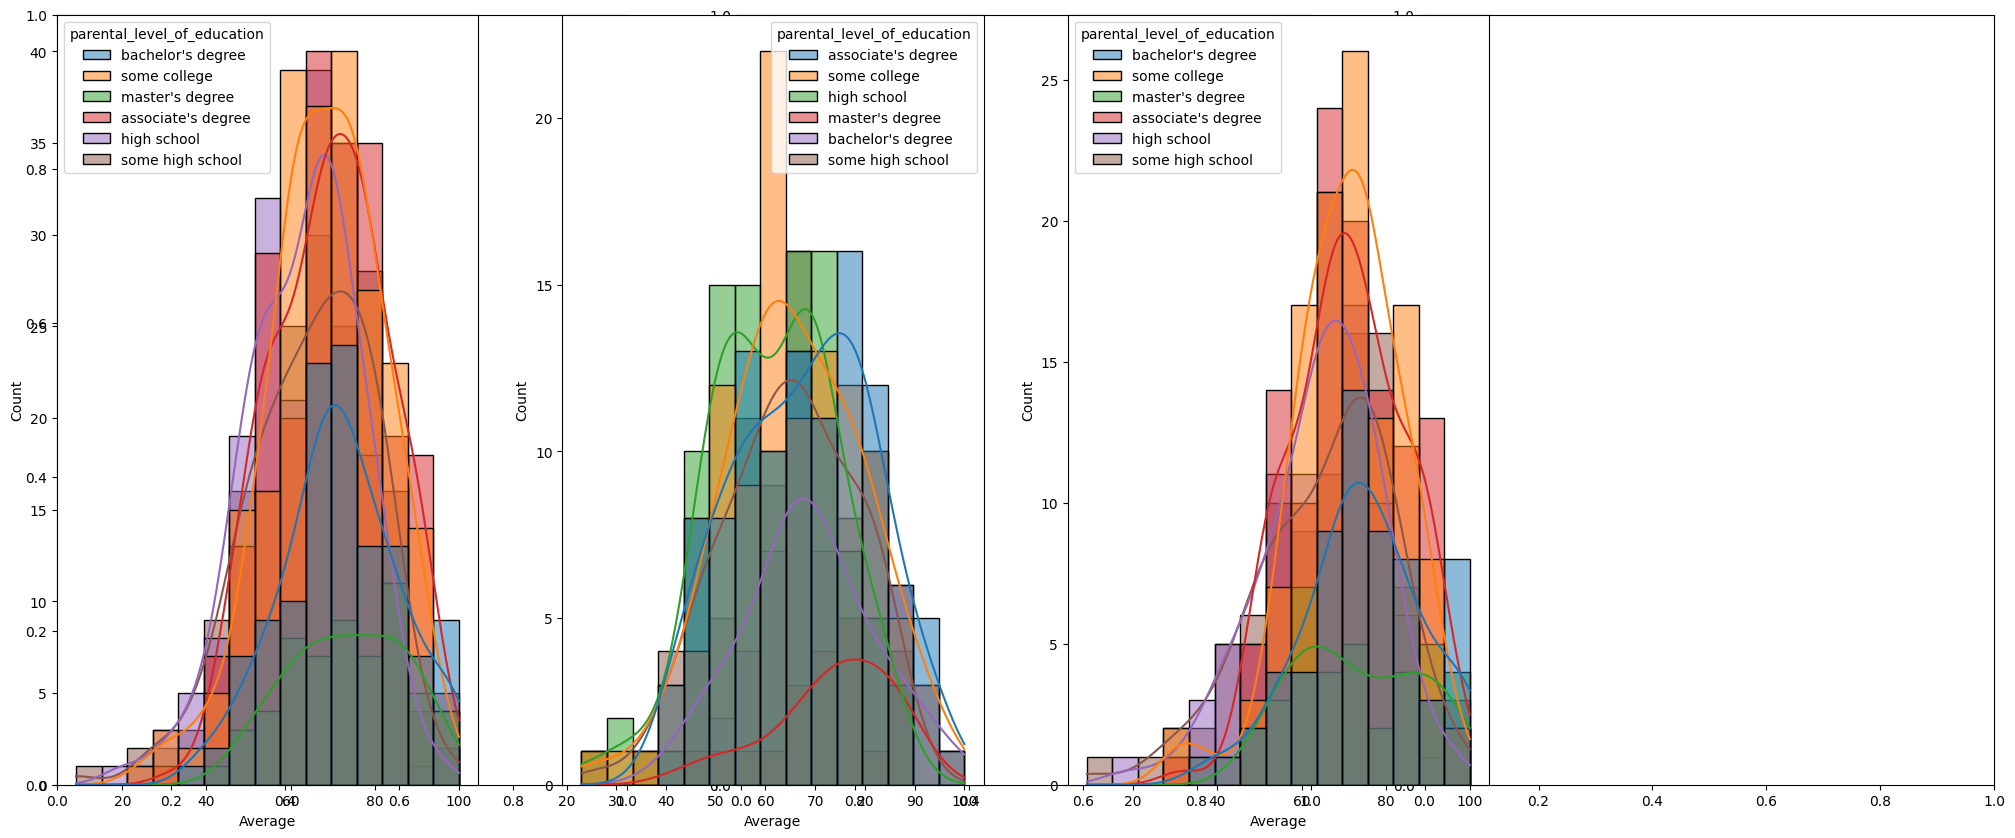

In [62]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(141)
sns.histplot(data=df,x='Average',bins=15,hue='parental_level_of_education',kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='Average',bins=15,kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,bins=15,hue='parental_level_of_education')

## Insights 
1. Parent's education does not play an important role in the student's progress
2. In 2nd plot , parents whose education is associte degree or master's degree their male child tend to perform well in exams
3. In 3rd plot , there is not effect of parent's education on female students 

<Axes: xlabel='Average', ylabel='Count'>

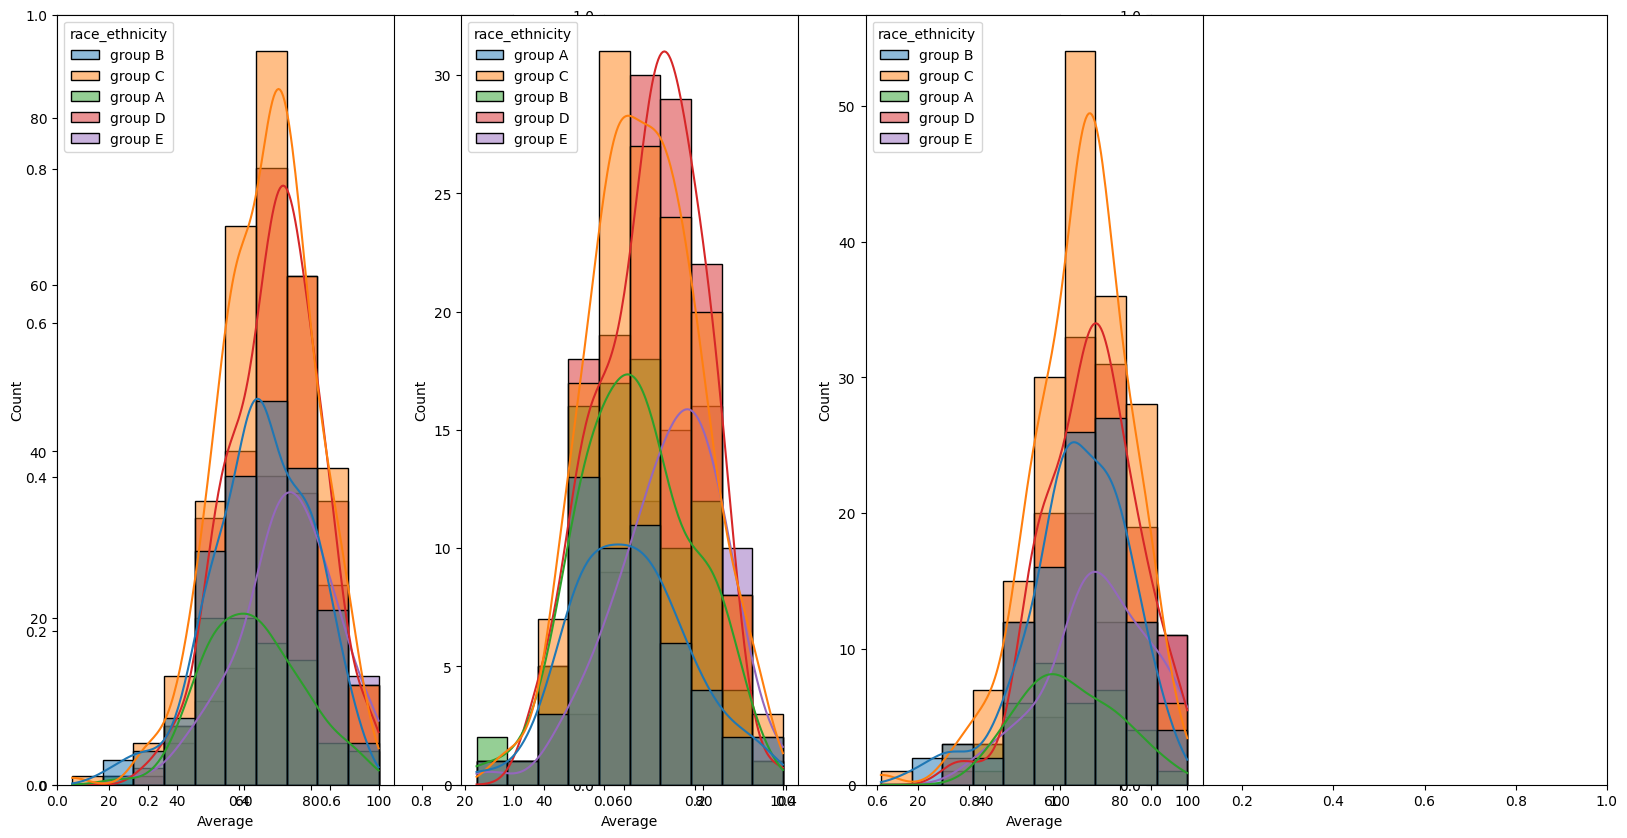

In [65]:
plt.subplots(1,3,figsize=(20,10))
plt.subplot(141)
sns.histplot(data=df,x="Average",kde=True,bins=10,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],kde=True,bins=10,x='Average',hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],kde=True,bins=10,x='Average',hue='race_ethnicity')

## Insights 
1. Students of group A and B perform poor in exams irrespective of what their gender is 

## Maximium score of students in all subjects 

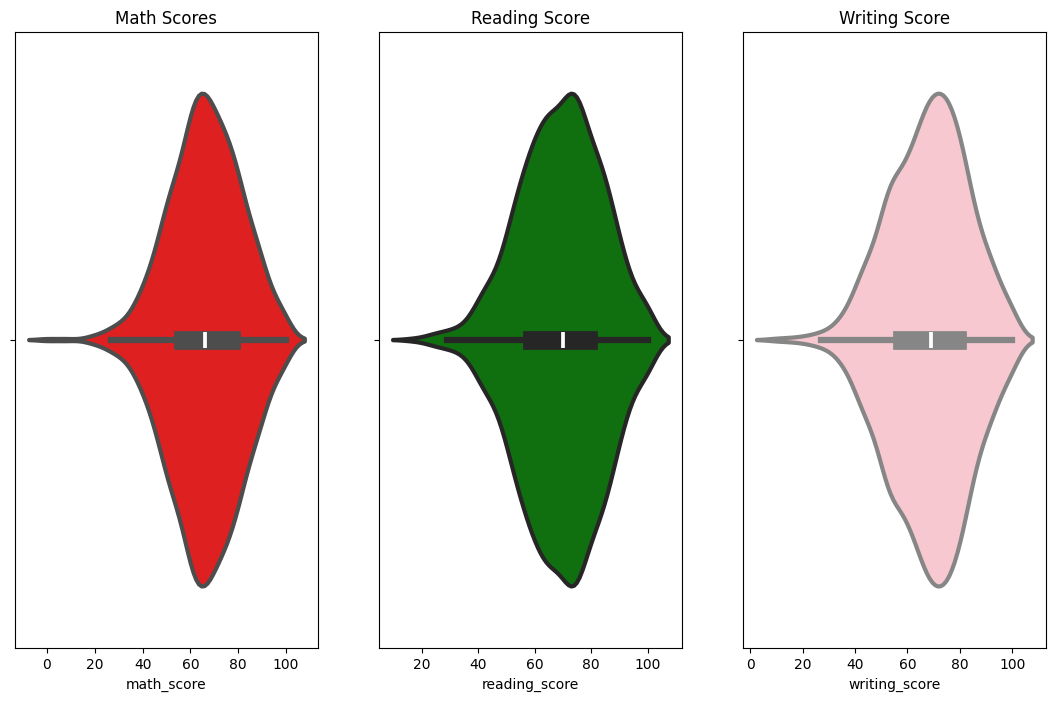

In [72]:
plt.figure(figsize=(18,8))
plt.subplot(141)
plt.title("Math Scores")
sns.violinplot(data=df,color='red',linewidth=3,x='math_score')
plt.subplot(142)
plt.title("Reading Score")
sns.violinplot(data=df,color='green',linewidth=3,x='reading_score')
plt.subplot(143)
plt.title("Writing Score")
sns.violinplot(data=df,color='pink',linewidth=3,x='writing_score')
plt.show()

## Insights
1. In maths most of the students score from 60-80 
2. In reading and writing most of the students score from 50-80

### Multivariate analysis using pieplot 

In [82]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

(-1.25, 1.25, -1.25, 1.25)

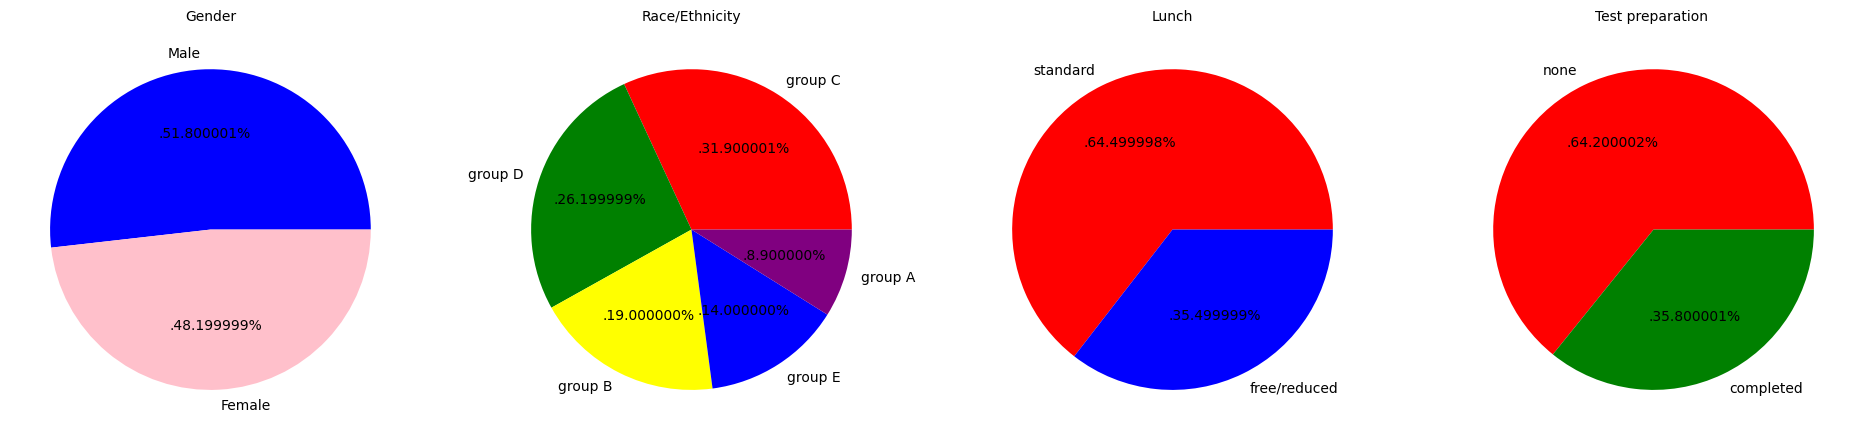

In [87]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(151)
size=df['gender'].value_counts()
labels='Male','Female'
color= ['Blue','Pink']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=10)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='group C','group D','group B','group E','group A '
color=['red','green','yellow','blue','purple']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Race/Ethnicity",fontsize=10)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='standard','free/reduced'
color=['red','blue']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Lunch",fontsize=10)
plt.axis('off')

plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels='none','completed'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Test preparation ",fontsize=10)
plt.axis('off')

In [86]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64